# BAX 452: Machine Learning 
## Final Project 

### PART 1: Exploratory Data Analysis (EDA)

In [2]:
#Loading packages  
import pandas as pd
import scipy 
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
import statsmodels.api as sm
from statsmodels.tools import add_constant
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, confusion_matrix
import os

/var/folders/_t/4mclhtz17llfbfh9qqmj6t5c0000gn/T/ipykernel_886/2761389492.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# get working directory 
os.getcwd()

'/Users/bernardoarambula/Downloads'

In [4]:
#load data 
df=pd.read_csv("/Users/bernardoarambula/Downloads/data.csv")
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [5]:
df.shape

(6819, 96)

We have 6,819 rows and 96 columns of data. 

In [6]:
#viewing column names, integer types and null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

All data types are numeric(float or integer) and we have no missing values in our data set. 

In [7]:
#count, mean, standard deviation, 5 number summary of all numeric columns 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Bankrupt?,6819.0,0.032263,0.176710,0.0,0.000000,0.000000,0.000000,1.0
ROA(C) before interest and depreciation before interest,6819.0,0.505180,0.060686,0.0,0.476527,0.502706,0.535563,1.0
ROA(A) before interest and % after tax,6819.0,0.558625,0.065620,0.0,0.535543,0.559802,0.589157,1.0
ROA(B) before interest and depreciation after tax,6819.0,0.553589,0.061595,0.0,0.527277,0.552278,0.584105,1.0
Operating Gross Margin,6819.0,0.607948,0.016934,0.0,0.600445,0.605997,0.613914,1.0
...,...,...,...,...,...,...,...,...
Liability to Equity,6819.0,0.280365,0.014463,0.0,0.276944,0.278778,0.281449,1.0
Degree of Financial Leverage (DFL),6819.0,0.027541,0.015668,0.0,0.026791,0.026808,0.026913,1.0
Interest Coverage Ratio (Interest expense to EBIT),6819.0,0.565358,0.013214,0.0,0.565158,0.565252,0.565725,1.0
Net Income Flag,6819.0,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.0


Here we can examine the mean, standard deviation, and the 5 number summary for every variable in our dataset. 

In [8]:
#Pearson Correlation Test 

num_cols=df.select_dtypes(include=[np.number]).columns.tolist()
col_list=[]

for col in num_cols: 
    if col != 'Banrupt?':
        x,y=col, 'Bankrupt?'
        
        dtf_noNan=df[df[x].notnull()]
        
        if x in dtf_noNan.columns and y in dtf_noNan.columns:
            coeff, p=scipy.stats.pearsonr(dtf_noNan[x],dtf_noNan[y])
            coeff, p=round(coeff, 3), round(p,3)
            
            if coeff>0:
                conclusion="Positive correlation"
            elif coeff<0:
                conclusion="Negative correlation"
            else: 
                conclusion="No correlation"
            
            if p<0.05: 
                print ("Pearson Correlation:", col, coeff, conclusion, "(p-value: "+str(p)+")")
                col_list.append(col)

Pearson Correlation: Bankrupt? 1.0 Positive correlation (p-value: 0.0)
Pearson Correlation:  ROA(C) before interest and depreciation before interest -0.261 Negative correlation (p-value: 0.0)
Pearson Correlation:  ROA(A) before interest and % after tax -0.283 Negative correlation (p-value: 0.0)
Pearson Correlation:  ROA(B) before interest and depreciation after tax -0.273 Negative correlation (p-value: 0.0)
Pearson Correlation:  Operating Gross Margin -0.1 Negative correlation (p-value: 0.0)
Pearson Correlation:  Realized Sales Gross Margin -0.099 Negative correlation (p-value: 0.0)
Pearson Correlation:  Research and development expense rate -0.024 Negative correlation (p-value: 0.045)
Pearson Correlation:  Cash flow rate -0.072 Negative correlation (p-value: 0.0)
Pearson Correlation:  Tax rate (A) -0.11 Negative correlation (p-value: 0.0)
Pearson Correlation:  Net Value Per Share (B) -0.165 Negative correlation (p-value: 0.0)
Pearson Correlation:  Net Value Per Share (A) -0.165 Negati

/var/folders/_t/4mclhtz17llfbfh9qqmj6t5c0000gn/T/ipykernel_886/1261413820.py:13: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  coeff, p=scipy.stats.pearsonr(dtf_noNan[x],dtf_noNan[y])


We examine the correlations between each variable and bankruptcy. Here we can see which variables have a positive and negative correlation with our outcome variable. 

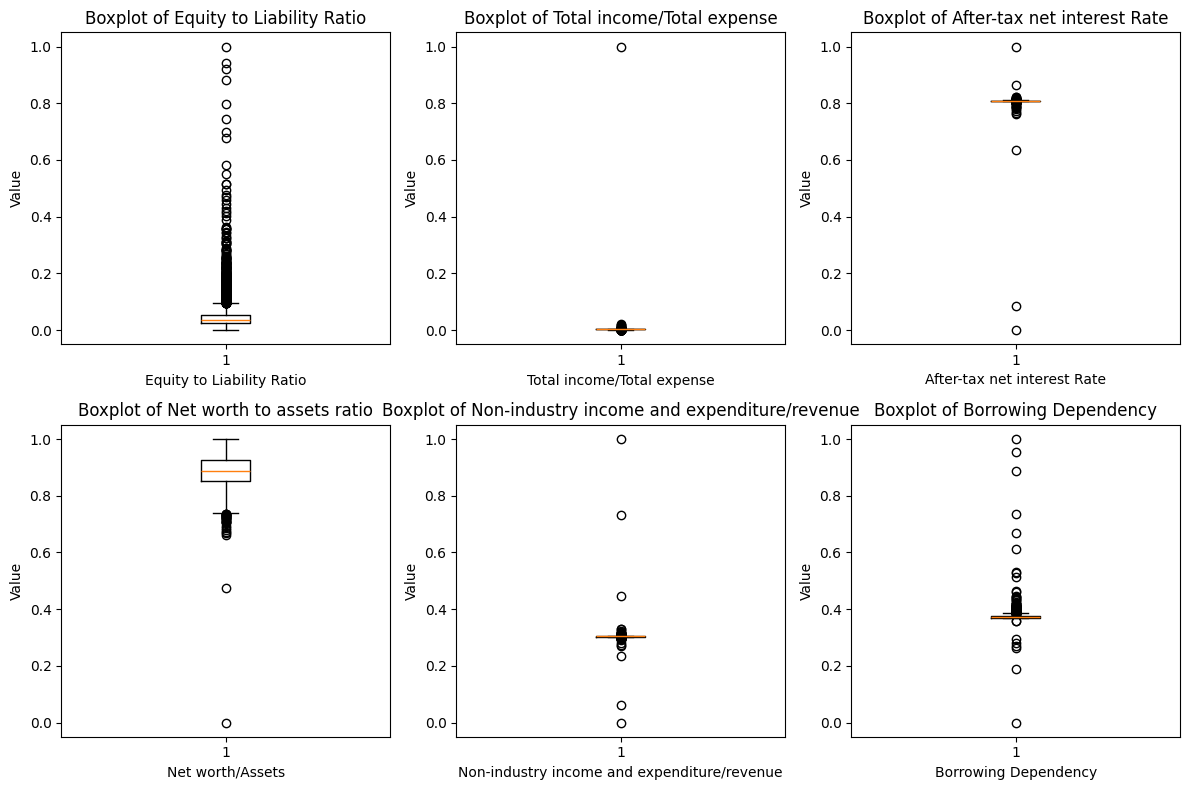

In [38]:
import matplotlib.pyplot as plt

# Create subplots with a 2x3 layout
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Create the first boxplot
axes[0, 0].boxplot(df[' Equity to Liability'])
axes[0, 0].set_xlabel('Equity to Liability Ratio')
axes[0, 0].set_ylabel('Value')
axes[0, 0].set_title('Boxplot of Equity to Liability Ratio')

# Create the second boxplot
axes[0, 1].boxplot(df[' Total income/Total expense'])
axes[0, 1].set_xlabel('Total income/Total expense')
axes[0, 1].set_ylabel('Value')
axes[0, 1].set_title('Boxplot of Total income/Total expense')

# Create the third boxplot
axes[0, 2].boxplot(df[' After-tax net Interest Rate'])
axes[0, 2].set_xlabel('After-tax net interest Rate')
axes[0, 2].set_ylabel('Value')
axes[0, 2].set_title('Boxplot of After-tax net interest Rate')

# Create the fourth boxplot
axes[1, 0].boxplot(df[' Net worth/Assets'])
axes[1, 0].set_xlabel('Net worth/Assets')
axes[1, 0].set_ylabel('Value')
axes[1, 0].set_title('Boxplot of Net worth to assets ratio') 

# Create the fifth boxplot
axes[1, 1].boxplot(df[' Non-industry income and expenditure/revenue'])
axes[1, 1].set_xlabel('Non-industry income and expenditure/revenue')
axes[1, 1].set_ylabel('Value')
axes[1, 1].set_title('Boxplot of Non-industry income and expenditure/revenue')

# Create the sixth boxplot
axes[1, 2].boxplot(df[' Borrowing dependency'])
axes[1, 2].set_xlabel('Borrowing Dependency')
axes[1, 2].set_ylabel('Value')
axes[1, 2].set_title('Boxplot of Borrowing Dependency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


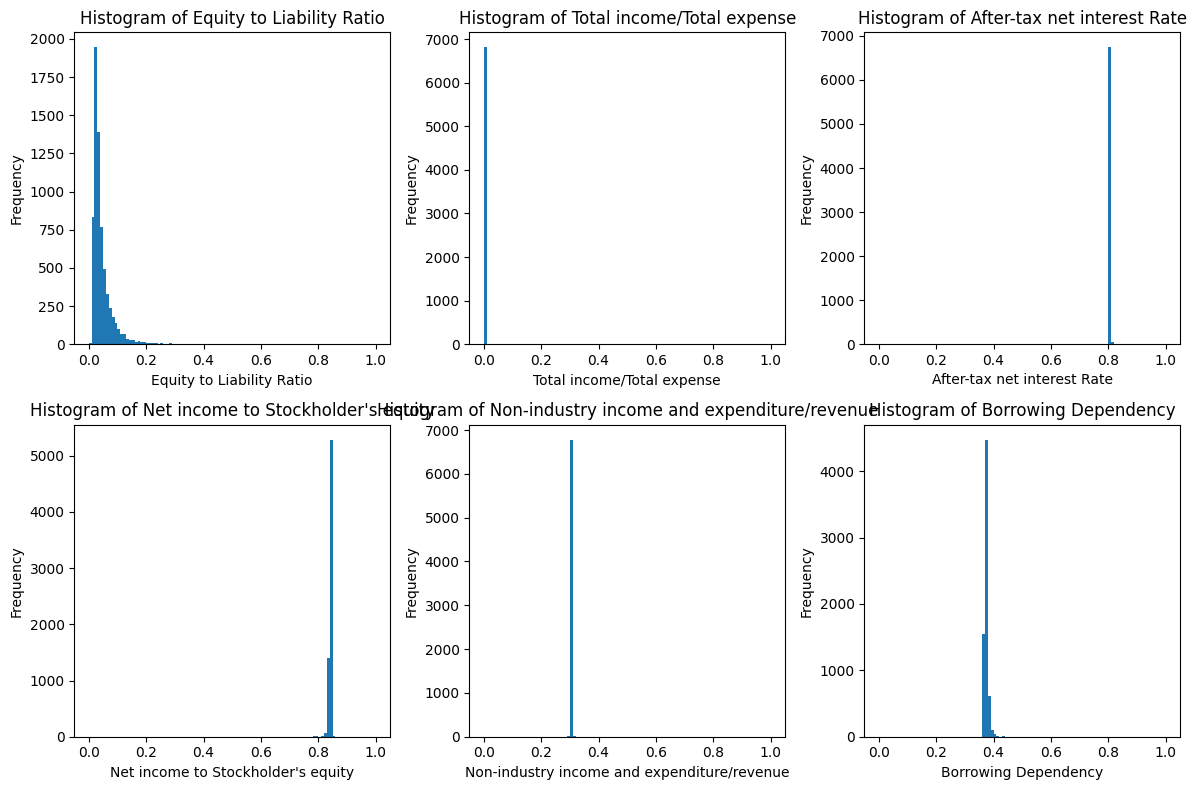

In [48]:
# Create subplots with a 2x3 layout
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Create histograms for each variable
axes[0, 0].hist(df[' Equity to Liability'], bins = 100)
axes[0, 0].set_xlabel('Equity to Liability Ratio')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Histogram of Equity to Liability Ratio')

axes[0, 1].hist(df[' Total income/Total expense'], bins = 100)
axes[0, 1].set_xlabel('Total income/Total expense')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Histogram of Total income/Total expense')

axes[0, 2].hist(df[' After-tax net Interest Rate'], bins = 100)
axes[0, 2].set_xlabel('After-tax net interest Rate')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Histogram of After-tax net interest Rate')

axes[1, 0].hist(df[" Net Income to Stockholder's Equity"], bins = 100)  # Handling apostrophe
axes[1, 0].set_xlabel("Net income to Stockholder's equity")
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title("Histogram of Net income to Stockholder's equity")  # Handling apostrophe

axes[1, 1].hist(df[' Non-industry income and expenditure/revenue'], bins = 100)
axes[1, 1].set_xlabel('Non-industry income and expenditure/revenue')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Histogram of Non-industry income and expenditure/revenue')

axes[1, 2].hist(df[' Borrowing dependency'], bins = 100)
axes[1, 2].set_xlabel('Borrowing Dependency')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].set_title('Histogram of Borrowing Dependency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


- we don't see very much variation in the data, with selected variable having a very centralized distribution.

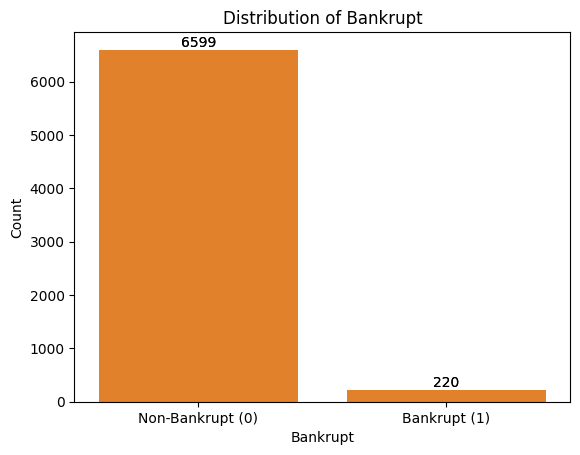

In [9]:
# distibution of bankruptcy 
label = sns.countplot(data=df, x='Bankrupt?')
sns.countplot(data=df, x='Bankrupt?')
plt.xlabel('Bankrupt')
plt.ylabel('Count')
plt.title('Distribution of Bankrupt')
plt.xticks(ticks=[0, 1], labels=['Non-Bankrupt (0)', 'Bankrupt (1)'])  # Set x-axis labels

# Annotate count values on top of each bar
for p in label.patches:
    label.text(p.get_x() + p.get_width()/2., p.get_height(), f'{p.get_height():.0f}', ha='center', va='bottom')

plt.show()

Here we can see that there are 220 entries in the dataset that have gone bankrupt while 6,599 have not. This imbalance may lead to lower predictive power in some models. Models that are more robust to class imbalance such as random forests may provide better predictions.

*** EDA boxplot comparisons? 

## 1) Logistic Regression Model Development 

We will begin our analysis by fitting the data to a logistic regression model to predict if a company will go bankrupt based off of their attributes. We will use the full model with all of the variables to initially fit our model. 

In [10]:
#Full model 

X=df.drop('Bankrupt?', axis=1)
y=df[['Bankrupt?']]

# add a constant 
X = sm.add_constant(X)

# split test 20% and train 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Fit logistic regression model with standardized values and balancing class weight  
scaler = StandardScaler()
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_regression', LogisticRegression(class_weight='balanced'))
])
pipeline.fit(X_train, y_train)
# Transform X_train and X_test using the fitted scaler
X_train_scaled = pipeline.named_steps['scaler'].transform(X_train)
X_test_scaled = pipeline.named_steps['scaler'].transform(X_test)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
#predictions on the test set
pipeline_y_pred = pipeline.predict(X_test)

# out of sample metrics 
# Compute Mean Squared Error
mse = mean_squared_error(y_test, pipeline_y_pred)
print("OOS MSE:", mse)
#oos accuracy
accuracy = accuracy_score(y_test, pipeline_y_pred)
print("OOS Accuracy:", accuracy)



OOS MSE: 0.13049853372434017
OOS Accuracy: 0.8695014662756598


In [12]:
#out of sample metrics
pipeline_conf_matrix = confusion_matrix(y_test, pipeline_y_pred)
pipeline_class_report = classification_report(y_test, pipeline_y_pred)

print("Classification Report:\n", pipeline_class_report)
print("Confusion Matrix:\n", pipeline_conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93      1313
           1       0.18      0.73      0.29        51

    accuracy                           0.87      1364
   macro avg       0.59      0.80      0.61      1364
weighted avg       0.96      0.87      0.90      1364

Confusion Matrix:
 [[1149  164]
 [  14   37]]


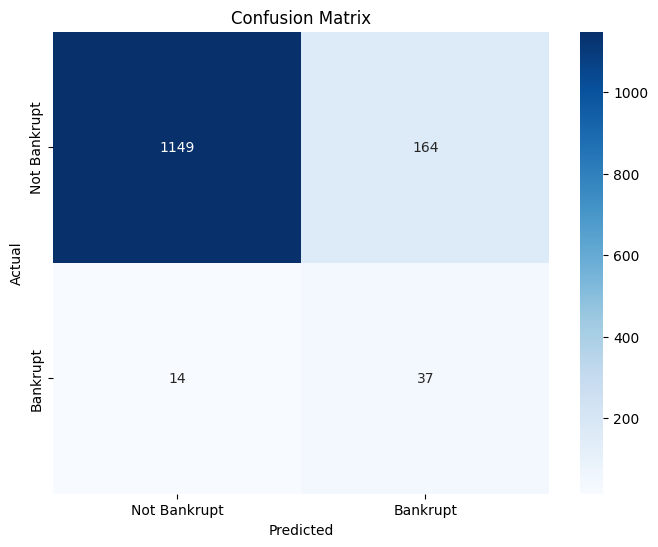

In [13]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, pipeline_y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
diag_labels = ['Not Bankrupt', 'Bankrupt']  
plt.xticks(ticks=[0.5, 1.5], labels=diag_labels)
plt.yticks(ticks=[0.5, 1.5], labels=diag_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Classification Report Analysis:
- Precision- ratio of true positive predictions to the total number of positive predictions 
- Recall (sensitivity)- ratio of true positive preditctions to toal number of actual positive occurances
- F1 - the harmonic mean of precision and recall, higher indicates better performance
- support- number of occurances of each class in the dataset
- accuracy- how correct the model is overall 
- macro average- unweighted average of precision, recall, and F-1 score 
- weighted average- average of precision, recall, and F-1 score weighted by the influence from each class

<br>

### Confusion Matrix: 
- True Positives (classified as bankrupt and are bankrupt): 37
- True Negatives (classified as not bankrupt and aren't bankrupt): 1149
- False Postives (Classified as bankrupt and aren't bankrupt): 164
- False Negatives (Classified as not bankrupt and are bankrupt): 14




We can see that the overall accuracy of the model out of sample is high at 97% although we can see that the precision, recall, and F-1 scores are significantly lower for predicting those that went bankrupt correctly. 

In [14]:
#displaying which variables have the most effect on predicting bankruptcy 
coefficients = pipeline.named_steps['logistic_regression'].coef_[0]
coef = pd.DataFrame({'Feature':  X_train.columns, 'Coefficient': coefficients})
coef = coef.sort_values(by='Coefficient', ascending=False)
coef


,Feature,Coefficient
39,Borrowing dependency,1.628461
41,Operating profit/Paid-in capital,1.284512
36,Debt ratio %,1.064729
21,Operating Profit Per Share (Yuan ¥),1.061313
17,Net Value Per Share (C),0.781526
...,...,...
94,Equity to Liability,-1.193753
90,Liability to Equity,-1.349633
15,Net Value Per Share (B),-1.426196
45,Accounts Receivable Turnover,-1.438906


### Interpretation: 
Here the coefficients illustrate the increase/decrease in log odds of going bankrupt for a unit increase in each feature. 

## 2) False Discovery Rate Analysis: Benjamini-Hochberg Procedure

We will now use the BH procedure to control for the number of false positives in identifying significant variables to predict bankruptcy. 

/var/folders/_t/4mclhtz17llfbfh9qqmj6t5c0000gn/T/ipykernel_886/1532341225.py:6: RuntimeWarning: invalid value encountered in sqrt
  std_err = np.sqrt(np.diag(np.linalg.inv(np.dot(X_train.T, X_train))))


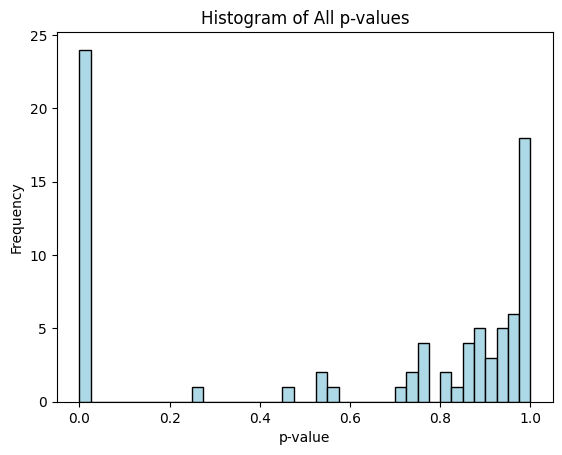

In [15]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from scipy.stats import norm

# Compute standard errors 
std_err = np.sqrt(np.diag(np.linalg.inv(np.dot(X_train.T, X_train))))

# Compute z-statistics
z_stats = coefficients / std_err

# Compute p-values
pvals = 2 * (1 - norm.cdf(np.abs(z_stats)))

# Plot the histogram of all p-values
plt.hist(pvals, bins=40,color="lightblue", edgecolor="black")
plt.xlabel("p-value")
plt.ylabel("Frequency")
plt.title("Histogram of All p-values")
plt.show()

In [16]:
# Estimate the number of true discoveries at q=0.1

# Number of tests
m = len(pvals)

# Desired false discovery rate
q = 0.1

# Sort p-values and compute critical BH threshold
sorted_p_values = np.sort(pvals)
critical_values = [q * (i+1) / m for i in range(m)]

# Find the largest p-value that is smaller than the BH critical value
significant_p_values_mask = sorted_p_values <= critical_values
max_index = np.where(significant_p_values_mask)[0].max() if significant_p_values_mask.any() else 0
significant_p_values = sorted_p_values[:max_index+1]

# Estimate the number of true discoveries
num_true_discoveries = len(significant_p_values)
print(f"The estimated number of true discoveries when q=0.1 is {num_true_discoveries}.")


The estimated number of true discoveries when q=0.1 is 24.


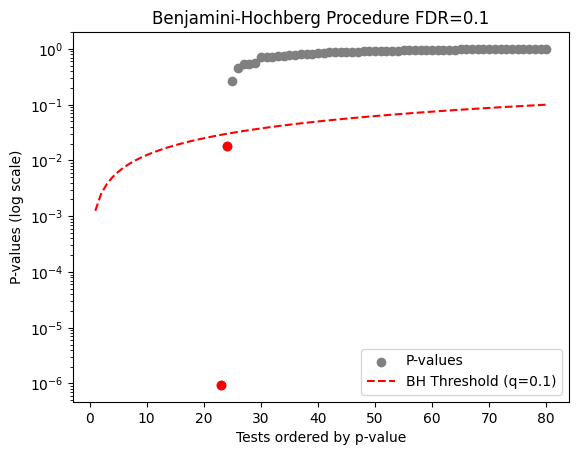

In [20]:
def fdr_bh(pvals, q=0.1, plotit=False):
    pvals = np.array(pvals)
    pvals = pvals[~np.isnan(pvals)]  # Remove NaN values
    N = len(pvals)
    
    # Sort p-values and compute BH critical values
    sorted_pvals = np.sort(pvals)
    ranks = np.arange(1, N+1)
    bh_critical_values = (ranks / N) * q
    
    # Find the largest p-value where p-value < BH critical value
    below_threshold = sorted_pvals <= bh_critical_values
    max_index = np.where(below_threshold)[0].max() if any(below_threshold) else -1
    alpha = sorted_pvals[max_index] if max_index != -1 else 0
    
    if plotit:
        # Plotting
        plt.scatter(np.arange(1, N+1), sorted_pvals, color='grey', label='P-values')  # All p-values in grey
        if max_index != -1:
            plt.scatter(np.arange(1, max_index+2), sorted_pvals[:max_index+1], color='red')  # Significant p-values in red
        plt.plot(np.arange(1, N+1), bh_critical_values, 'r--', label=f'BH Threshold (q={q})')
        plt.xlabel('Tests ordered by p-value')
        plt.ylabel('P-values (log scale)')
        plt.yscale('log')
        plt.title('Benjamini-Hochberg Procedure FDR=0.1')
        plt.legend()
        plt.show()
    
    return alpha


alpha_threshold=fdr_bh(pvals, q = 0.1, plotit = True)

In [21]:
# finding the number or true discoveries when q=0.1
true_dis=(pvals<alpha_threshold).sum().sum()
print(f"Number of 'true' discoveries: {true_dis} when q=0.1.")

Number of 'true' discoveries: 23 when q=0.1.


In [18]:
selected_features = X.columns[pvals < alpha_threshold]
selected_features

Index([' Operating Expense Rate', ' Research and development expense rate',
       ' Interest-bearing debt interest rate', ' Revenue Per Share (Yuan ¥)',
       ' Total Asset Growth Rate', ' Current Ratio', ' Quick Ratio',
       ' Total debt/Total net worth', ' Accounts Receivable Turnover',
       ' Average Collection Days', ' Inventory Turnover Rate (times)',
       ' Fixed Assets Turnover Frequency', ' Revenue per person',
       ' Allocation rate per person', ' Cash/Total Assets',
       ' Quick Assets/Current Liability', ' Cash/Current Liability',
       ' Inventory/Current Liability',
       ' Long-term Liability to Current Assets',
       ' Current Asset Turnover Rate', ' Quick Asset Turnover Rate',
       ' Cash Turnover Rate', ' Total assets to GNP price'],
      dtype='object')

In [19]:
X_reduced = X[selected_features]
logreg = LogisticRegression(max_iter=10000, solver='liblinear')
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores_reduced = cross_val_score(logreg, X_reduced, y, cv=cv, scoring='accuracy')
average_performance_reduced = np.mean(scores_reduced)

X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

pipeline.fit(X_train_reduced, y_train_reduced)

pipeline_reduced = pipeline.predict(X_test_reduced)
pipeline_reduced_conf_matrix = confusion_matrix(y_test_reduced, pipeline_reduced)
pipeline_reduced_class_report = classification_report(y_test_reduced, pipeline_reduced)

print("Reduced Model Cross-Validation Accuracy:", average_performance_reduced)
print("Classification Report:\n", pipeline_reduced_class_report)
print("Confusion Matrix:\n", pipeline_reduced_conf_matrix)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/uti

Reduced Model Cross-Validation Accuracy: 0.9658308249469254
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.64      0.78      1313
           1       0.08      0.80      0.14        51

    accuracy                           0.65      1364
   macro avg       0.53      0.72      0.46      1364
weighted avg       0.95      0.65      0.75      1364

Confusion Matrix:
 [[839 474]
 [ 10  41]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


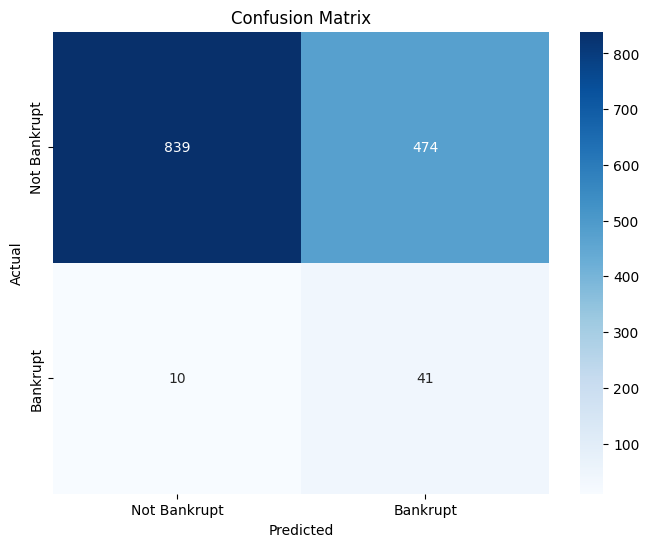

In [20]:
# Calculate confusion matrix visual
conf_matrix = confusion_matrix(y_test, pipeline_reduced)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
diag_labels = ['Not Bankrupt', 'Bankrupt']  
plt.xticks(ticks=[0.5, 1.5], labels=diag_labels)
plt.yticks(ticks=[0.5, 1.5], labels=diag_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Confusion Matrix: 
- True Positives (classified as bankrupt and are bankrupt): 41
- True Negatives (classified as not bankrupt and aren't bankrupt): 839
- False Postives (Classified as bankrupt and aren't bankrupt): 474
- False Negatives (Classified as not bankrupt and are bankrupt): 10
<br>

Here we can see that the reduced model using the significant variables from BH procedure increase the out of sample redictive performance for not bankrupt but decreased for baknrupt. The overall predicitve performance of the model slightly decreased. 

## 3) Regularization: Lasso CV

In [28]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming you have X_train_scaled and y_train defined
alphas = np.logspace(-6, 6, 13)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
lasso_cv = LogisticRegressionCV(Cs=alphas, penalty='l1', solver='liblinear', cv=cv, random_state=42)

# Fit the LassoCV model
lasso_cv.fit(X_train_scaled, y_train)

# Get the optimal C value (inverse of alpha) from LassoCV
optimal_C = lasso_cv.C_[0]
optimal_alpha = 1 / optimal_C
print("Optimal Alpha:", optimal_alpha)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site

Optimal Alpha: 100.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [38]:
print("Lasso coefficients:", lasso_cv.coef_)
print("Intercept:", lasso_cv.intercept_)

Lasso coefficients: [[ 0.          0.         -0.0026802   0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.17100196 -0.0947866   0.          0.03190801  0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.         -0.36418637  0.          0.          0.   

In [44]:
# Assuming you have only one target class
coefficients = lasso_cv.coef_[0]

# Pair variable names with lasso coefficients
columns = df.drop('Bankrupt?', axis=1)
variable_names = list(columns)
features = dict(zip(variable_names, coefficients))
features


{' ROA(C) before interest and depreciation before interest': 0.0,
 ' ROA(A) before interest and % after tax': 0.0,
 ' ROA(B) before interest and depreciation after tax': -0.002680199932320674,
 ' Operating Gross Margin': 0.0,
 ' Realized Sales Gross Margin': 0.0,
 ' Operating Profit Rate': 0.0,
 ' Pre-tax net Interest Rate': 0.0,
 ' After-tax net Interest Rate': 0.0,
 ' Non-industry income and expenditure/revenue': 0.0,
 ' Continuous interest rate (after tax)': 0.0,
 ' Operating Expense Rate': 0.0,
 ' Research and development expense rate': 0.0,
 ' Cash flow rate': 0.0,
 ' Interest-bearing debt interest rate': 0.0,
 ' Tax rate (A)': 0.0,
 ' Net Value Per Share (B)': 0.0,
 ' Net Value Per Share (A)': 0.0,
 ' Net Value Per Share (C)': 0.0,
 ' Persistent EPS in the Last Four Seasons': 0.0,
 ' Cash Flow Per Share': 0.0,
 ' Revenue Per Share (Yuan ¥)': 0.0,
 ' Operating Profit Per Share (Yuan ¥)': 0.0,
 ' Per Share Net profit before tax (Yuan ¥)': 0.0,
 ' Realized Sales Gross Profit Growth 

In [45]:
# Filter to only show non-zero coefficients
non_zero_features = {var: coef for var, coef in features.items() if coef != 0}
non_zero_features

{' ROA(B) before interest and depreciation after tax': -0.002680199932320674,
 ' Debt ratio %': 0.1710019560861228,
 ' Net worth/Assets': -0.09478659625589365,
 ' Borrowing dependency': 0.03190801171913809,
 ' Net Income to Total Assets': -0.3641863677319881}

In [48]:
# Extract keys from non_zero_features dictionary
selected_features = list(non_zero_features.keys())

# Subset X_train and X_test with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train logistic regression model with selected features
logistic_model = LogisticRegression()
logistic_model.fit(X_train_selected, y_train)

# Evaluate logistic regression model
train_accuracy = logistic_model.score(X_train_selected, y_train)
test_accuracy = logistic_model.score(X_test_selected, y_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9697525206232814
Test Accuracy: 0.9633431085043989


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
from sklearn.linear_model import Lasso
# set up model on training data with the optimal alpha
#lasso = Lasso(alpha = optimal_alpha)
#lasso_model = lasso.fit(X_train_scaled, y_train)

y_pred_lasso=logistic_model.predict(X_test_selected)
# calculate in-sample mse and r2
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

print("Lasso MSE:", lasso_mse)

Lasso MSE: 0.036656891495601175


In [51]:
# Make predictions on the test set
predictions_reduced = logistic_model.predict(X_test_selected)

# Evaluate model performance
conf_matrix_reduced = confusion_matrix(y_test, predictions_reduced)
class_report_reduced = classification_report(y_test, predictions_reduced)

# Print performance metrics
print("Reduced Model Cross-Validation Accuracy:", average_performance_reduced)
print("Classification Report:\n", class_report_reduced)
print("Confusion Matrix:\n", conf_matrix_reduced)

Reduced Model Cross-Validation Accuracy: 0.9658308249469254
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       0.60      0.06      0.11        51

    accuracy                           0.96      1364
   macro avg       0.78      0.53      0.54      1364
weighted avg       0.95      0.96      0.95      1364

Confusion Matrix:
 [[1311    2]
 [  48    3]]


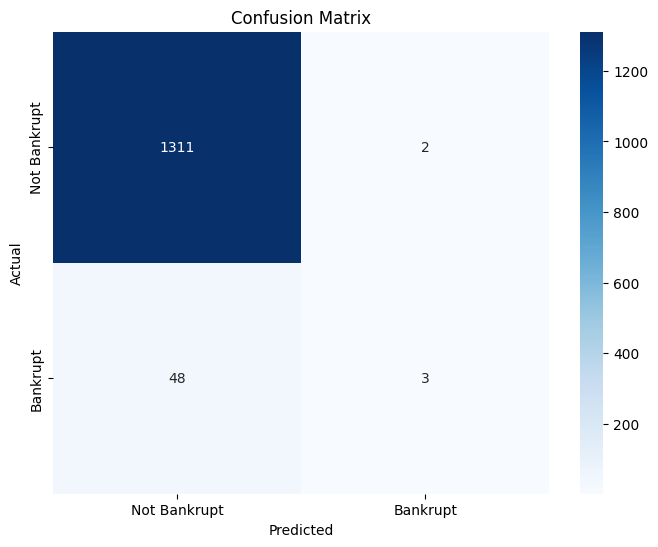

In [55]:
# Calculate confusion matrix
conf_matrix_lasso = confusion_matrix(y_test, predictions_reduced)  # Assuming predictions_reduced contains the model predictions

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lasso, annot=True, fmt='d', cmap='Blues')
diag_labels = ['Not Bankrupt', 'Bankrupt']  
plt.xticks(ticks=[0.5, 1.5], labels=diag_labels)
plt.yticks(ticks=[0.5, 1.5], labels=diag_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Confusion Matrix: 
- True Positives (classified as bankrupt and are bankrupt): 3
- True Negatives (classified as not bankrupt and aren't bankrupt): 1311
- False Postives (Classified as bankrupt and aren't bankrupt): 2
- False Negatives (Classified as not bankrupt and are bankrupt): 48


## 4) Classification Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
des_tree_model = DecisionTreeClassifier(random_state=42)


# Fit the model
des_tree_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_dt = des_tree_model.predict(X_test_scaled)

# Evaluate the model

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print('Accuracy:', accuracy_dt)
mse = mean_squared_error(y_test, y_pred_dt)
print('Mean Squared Error (MSE):', mse)

Accuracy: 0.9560117302052786
Mean Squared Error (MSE): 0.04398826979472141


In [24]:
# running decision tree using cross validation (in sample)
from sklearn.model_selection import cross_val_score

# 5x k-fold cross-validation
cv_scores = cross_val_score(des_tree_model, X_train_scaled, y_train, cv=5)

# Cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Average cross-validation score
mean_cv_score = cv_scores.mean()
print("Average Cross Validation Score:", mean_cv_score)


Cross-Validation Scores: [0.94867094 0.95508708 0.95417049 0.95692026 0.95783685]
Average Cross Validation Score: 0.9545371219065079


In [25]:
# Out of sample prediction
from sklearn.metrics import accuracy_score

# Perform cross-validated predictions (let's say k=5)
y_pred_cv = cross_val_predict(des_tree_model, X_train_scaled, y_train, cv=5)

# Fit the model on the entire training data
des_tree_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_test = des_tree_model.predict(X_test_scaled)

# Evaluate the model on the out-of-sample test data
accuracy_test = accuracy_score(y_test, y_pred_test)
print('Accuracy on Test Data:', accuracy_test)

# Evaluate the cross-validated predictions
accuracy_cv = accuracy_score(y_train, y_pred_cv)
print('Accuracy from Cross-Validation:', accuracy_cv)


Accuracy on Test Data: 0.9560117302052786
Accuracy from Cross-Validation: 0.9545371219065077


In [57]:
conf_matrix = confusion_matrix(y_test, y_pred_dt)
class_report = classification_report(y_test, y_pred_dt)


print("Classification Report:\n", class_report)
print("Confusion Matrix:\n",conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1313
           1       0.41      0.39      0.40        51

    accuracy                           0.96      1364
   macro avg       0.69      0.69      0.69      1364
weighted avg       0.96      0.96      0.96      1364

Confusion Matrix:
 [[1284   29]
 [  31   20]]


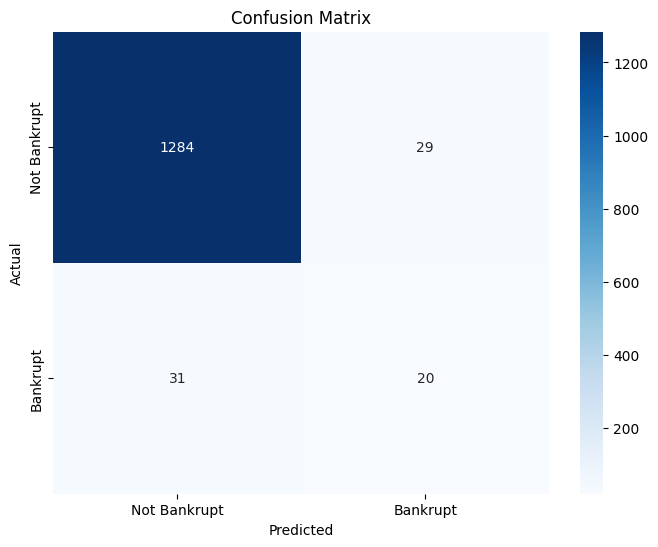

In [58]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
diag_labels = ['Not Bankrupt', 'Bankrupt']  
plt.xticks(ticks=[0.5, 1.5], labels=diag_labels)
plt.yticks(ticks=[0.5, 1.5], labels=diag_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Confusion Matrix: 
- True Positives (classified as bankrupt and are bankrupt): 20
- True Negatives (classified as not bankrupt and aren't bankrupt): 1284
- False Postives (Classified as bankrupt and aren't bankrupt): 29
- False Negatives (Classified as not bankrupt and are bankrupt): 31


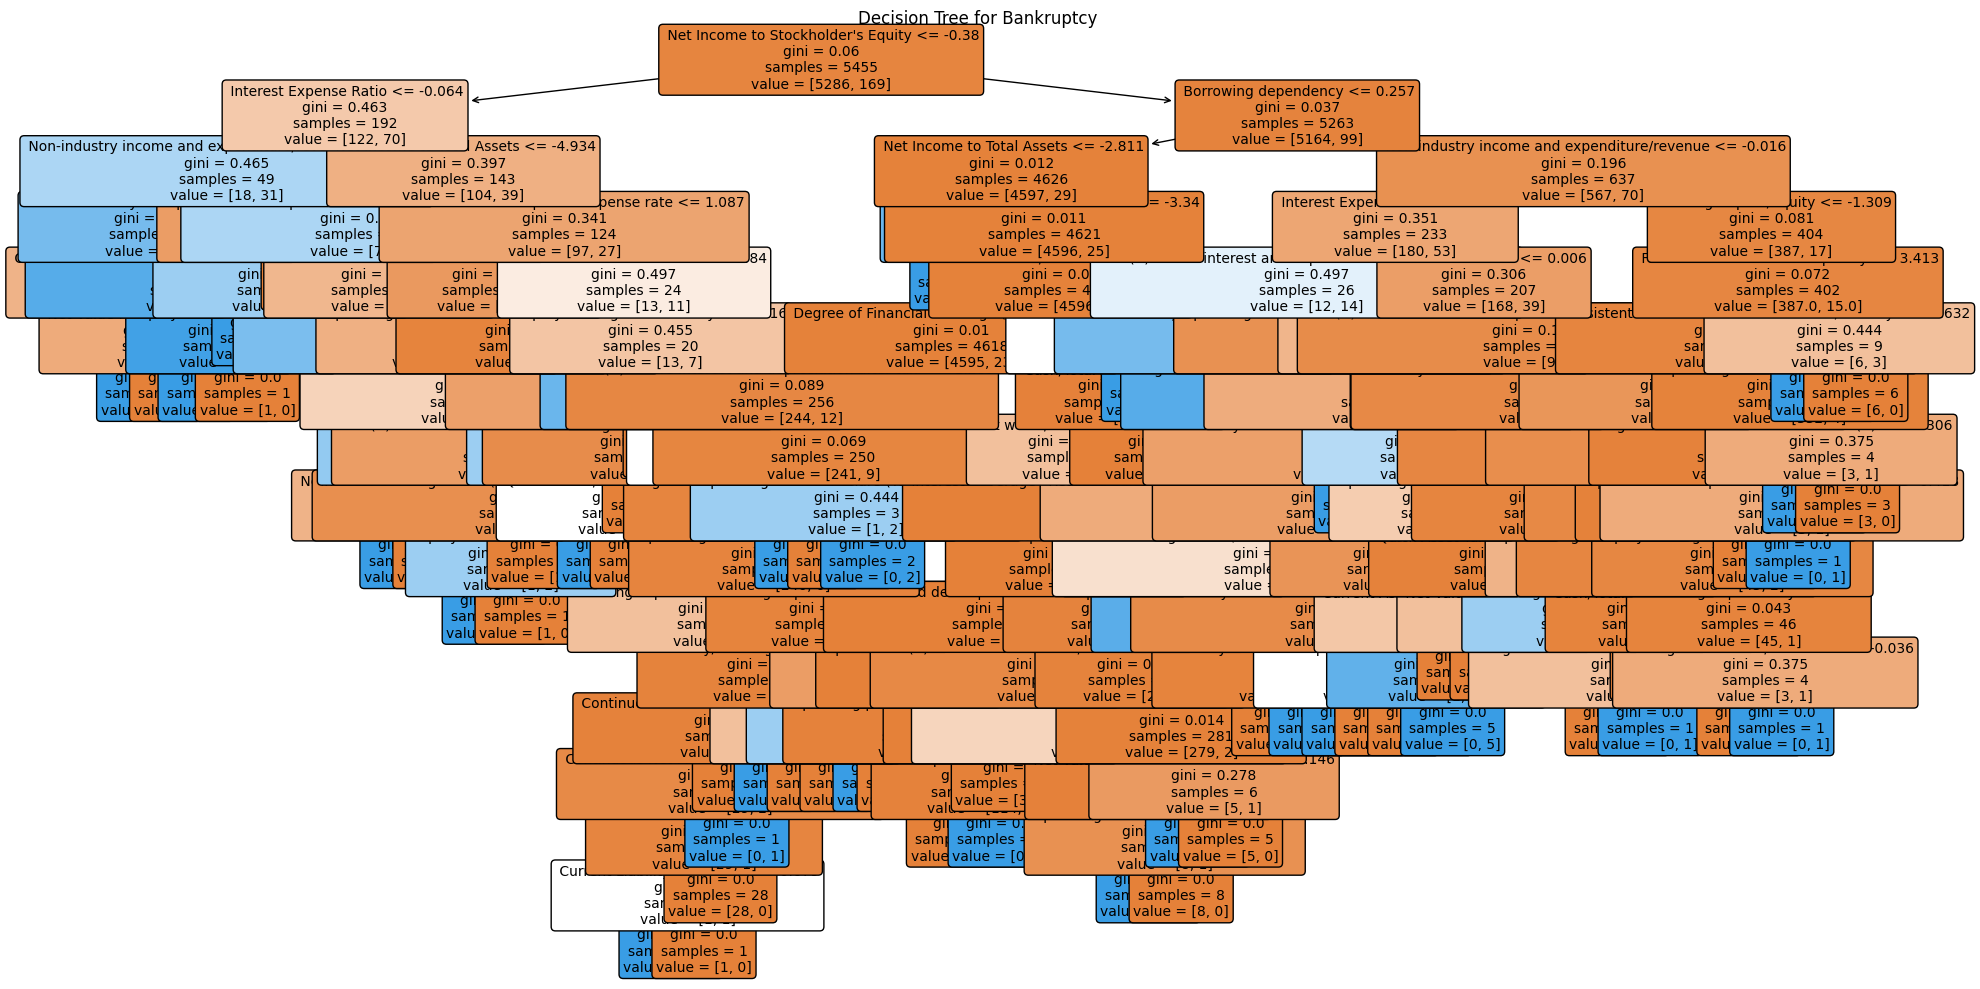

In [59]:
#plot tree 
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


plt.figure(figsize=(20,10))
plot_tree(des_tree_model, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree for Bankruptcy")
plt.tight_layout()
plt.show()

## 5) Random Forest Classification Model 

In [60]:
# set seed for reproducability 
np.random.seed(seed=10)

In [61]:
#determining class weights 
N_total = 6599 + 220
weight_0 = N_total / (6599 * 2)  # Weight for class 0
weight_1 = N_total / (220 * 2)   # Weight for class 1

class_weights = {0: weight_0, 1: weight_1}
print("Class weights:", class_weights)

Class weights: {0: 0.5166691923018639, 1: 15.497727272727273}


In [62]:

#using same splits from logistic regression model 

#scale data 
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

#assign weights to account for class imbalance
class_weights={0: 0.5166691923018639, 1: 15.497727272727273}
rf_model = RandomForestClassifier(class_weight=class_weights,n_estimators=100)
rf_model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight={0: 0.5166691923018639,
                                     1: 15.497727272727273})

In [63]:
#oos validation 

#predictions on the test set
rf_pred = rf_model.predict(X_test)

# Compute Mean Squared Error
mse = mean_squared_error(y_test, rf_pred)
print("OOS Mean Squared Error:", mse)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, rf_pred)
print("OOS Accuracy Score:", accuracy)


OOS Mean Squared Error: 0.03372434017595308
OOS Accuracy Score: 0.966275659824047


In [64]:
conf_matrix = confusion_matrix(y_test, rf_pred)
class_report = classification_report(y_test, rf_pred)


print("Classification Report:\n", class_report)
print("Confusion Matrix:\n",conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.69      0.18      0.28        51

    accuracy                           0.97      1364
   macro avg       0.83      0.59      0.63      1364
weighted avg       0.96      0.97      0.96      1364

Confusion Matrix:
 [[1309    4]
 [  42    9]]


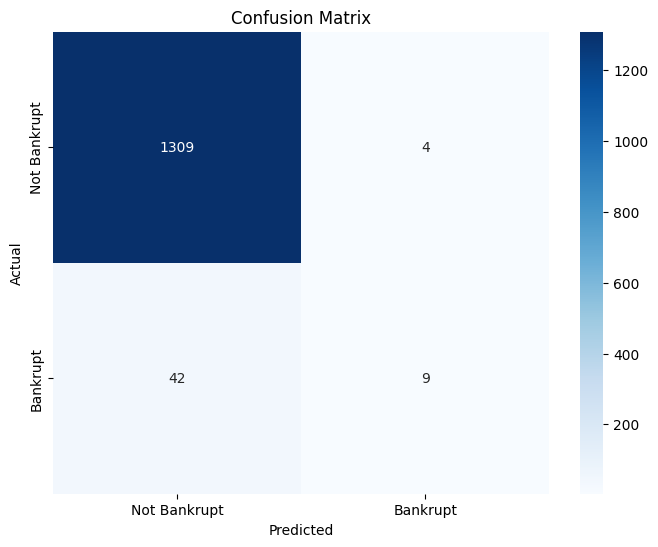

In [65]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, rf_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
diag_labels = ['Not Bankrupt', 'Bankrupt']  
plt.xticks(ticks=[0.5, 1.5], labels=diag_labels)
plt.yticks(ticks=[0.5, 1.5], labels=diag_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Confusion Matrix: 
- True Positives (classified as bankrupt and are bankrupt): 9
- True Negatives (classified as not bankrupt and aren't bankrupt): 1309
- False Postives (Classified as bankrupt and aren't bankrupt): 4
- False Negatives (Classified as not bankrupt and are bankrupt): 42


In [66]:
# Variable importance 

#mean decrease in impurity 
mdi=rf_model.feature_importances_

#Permutation Feature Importance 
pfi=permutation_importance(rf_model, X_test, y_test,random_state=42)
pfi_mean=pfi.importances_mean

#dataframe to compare mdi and permutation for each feature 
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'MDI': mdi,
    'Permutation': pfi_mean
})
print(feature_importance_df)

                                              Feature       MDI  Permutation
0    ROA(C) before interest and depreciation befor...  0.022407     0.002053
1              ROA(A) before interest and % after tax  0.012989     0.000000
2    ROA(B) before interest and depreciation after...  0.031986     0.003079
3                              Operating Gross Margin  0.003881     0.000000
4                         Realized Sales Gross Margin  0.005065     0.000000
..                                                ...       ...          ...
90                                Liability to Equity  0.028051     0.000733
91                 Degree of Financial Leverage (DFL)  0.015940     0.000000
92   Interest Coverage Ratio (Interest expense to ...  0.018573     0.000000
93                                    Net Income Flag  0.000000     0.000000
94                                Equity to Liability  0.039994     0.001760

[95 rows x 3 columns]


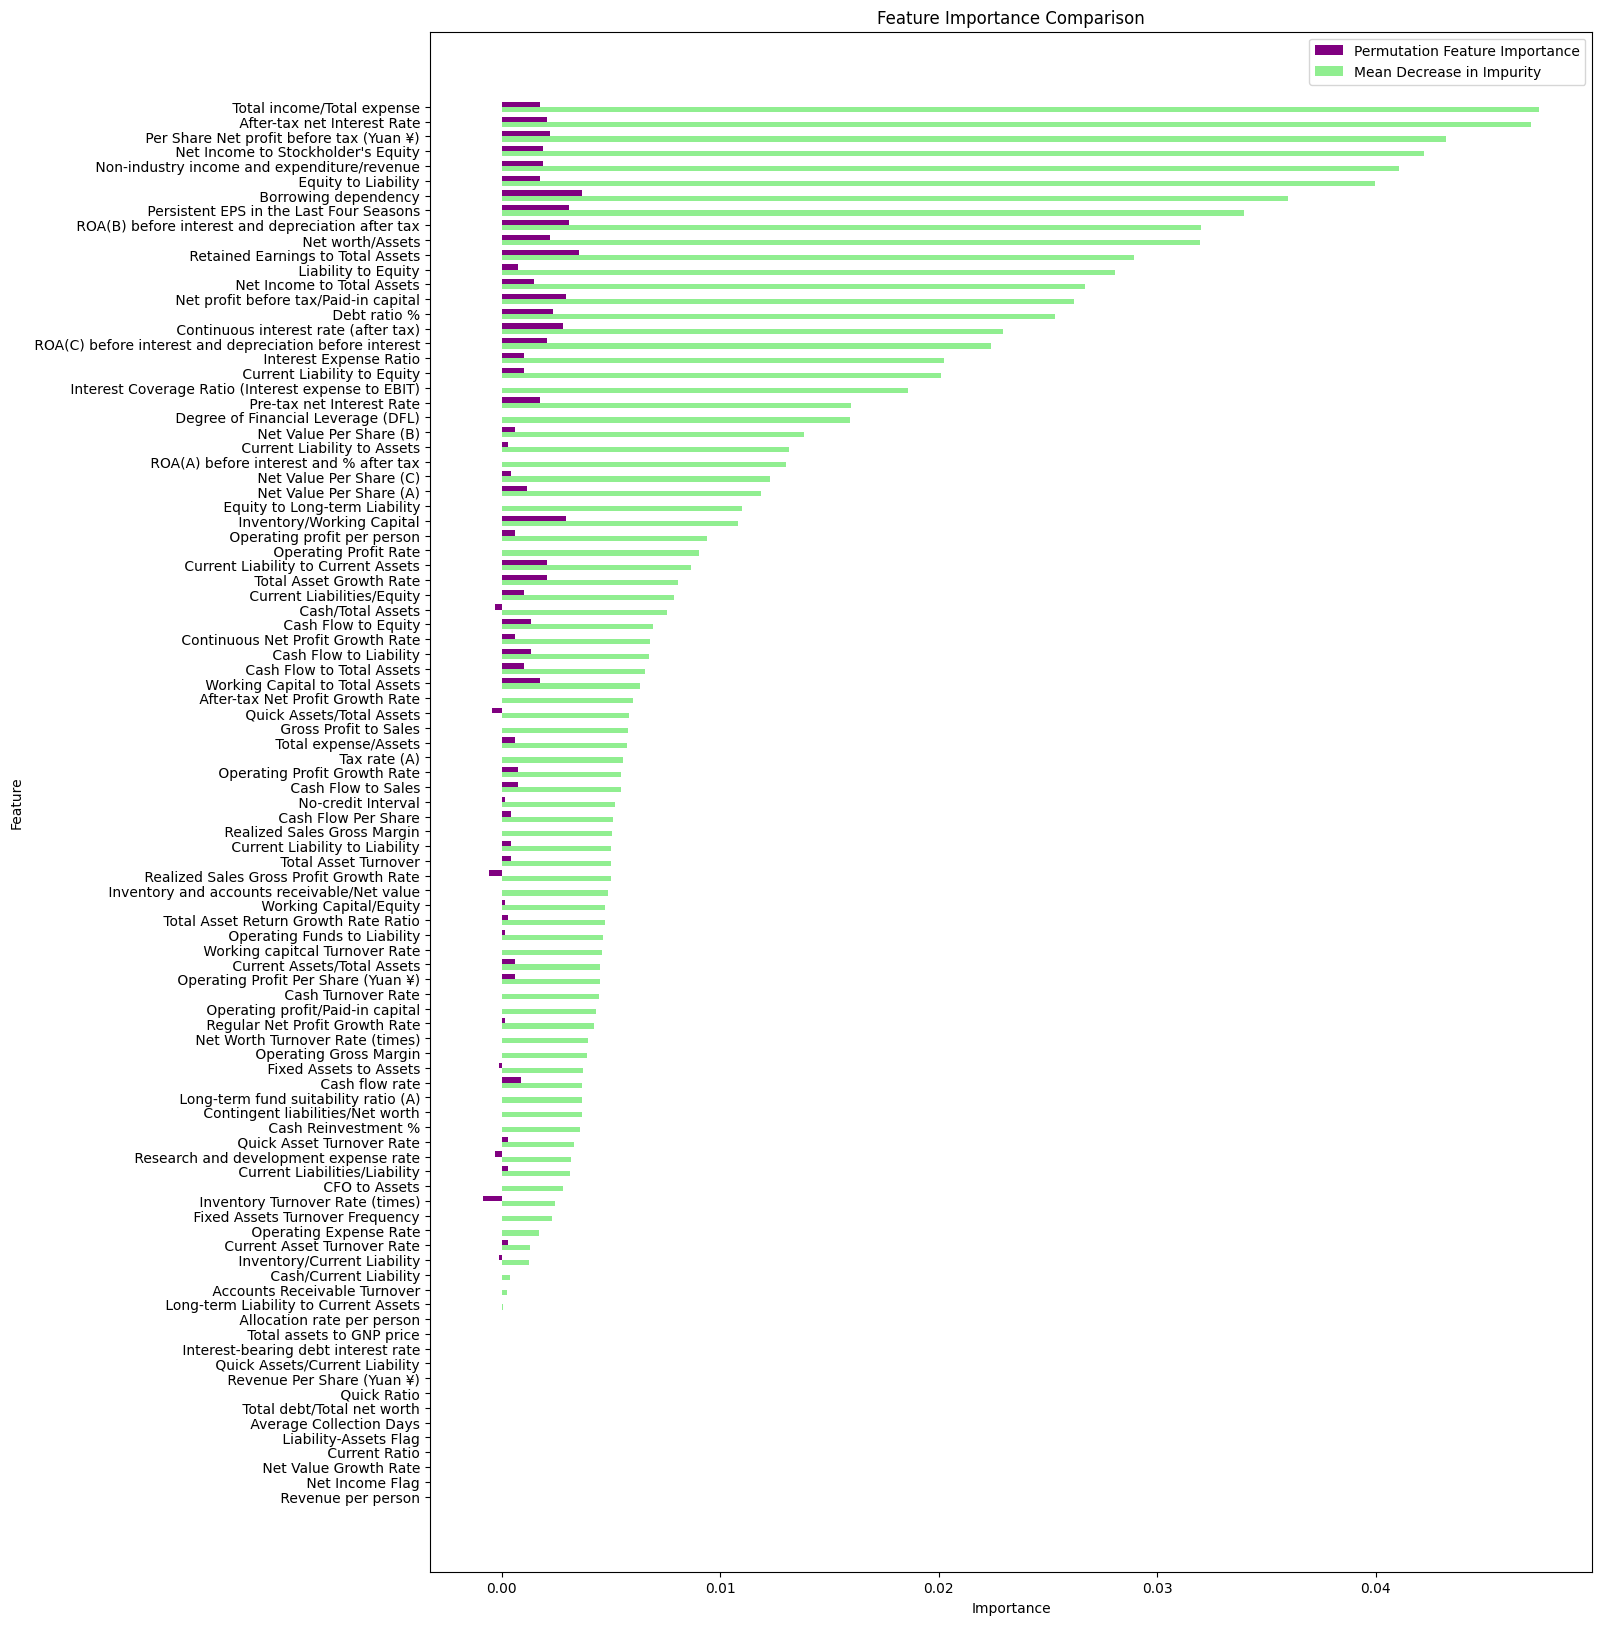

In [67]:
#sort feature importance
feature_importance_df_sorted = feature_importance_df.sort_values(by='MDI', ascending=False)

# Create bar chart
plt.figure(figsize=(15, 20))

# Set the width of the bars
bar_width = 0.35

# Set the positions for the bars
index = np.arange(len(feature_importance_df_sorted))

# Plot Permutation Feature Importance
plt.barh(index, feature_importance_df_sorted['Permutation'], bar_width, color='purple', label='Permutation Feature Importance')

# Plot Mean Decrease in Impurity (MDI) next to the Permutation Feature Importance
plt.barh(index + bar_width, feature_importance_df_sorted['MDI'], bar_width, color='lightgreen', label='Mean Decrease in Impurity')

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Comparison')
plt.yticks(index + bar_width / 2, feature_importance_df_sorted['Feature'])
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()

## K-Means Clustering 

In [68]:
#prepare data for clusters
df_cluster=df.drop('Bankrupt?', axis=1)

In [69]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Scale the data
ms = MinMaxScaler()
scaled_data = ms.fit_transform(df_cluster)
scaled_df = pd.DataFrame(scaled_data, columns=df_cluster.columns)  

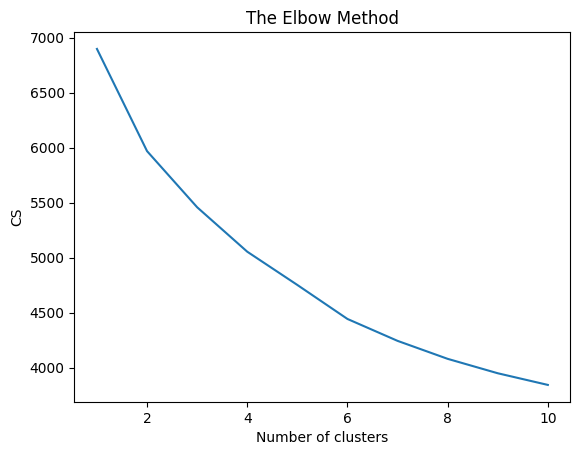

In [70]:
#choosing optimal K
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(scaled_df)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [71]:
#creating clusters using k=2
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(scaled_df)
#attach cluster labels to df
scaled_df['kmeans_cluster'] = kmeans.labels_
scaled_df.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,kmeans_cluster
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,9.388432e-13,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.0,0.016469,0
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,8.475867e-13,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.0,0.020794,0
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,4.073610e-12,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.0,0.016474,1
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,3.312093e-13,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.0,0.023982,0
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,3.948639e-13,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.0,0.035490,0


In [72]:
#count number in each cluster
scaled_df['kmeans_cluster'].value_counts()

kmeans_cluster
1    4694
0    2125
Name: count, dtype: int64

In [73]:
#adding back in bankrupt column with cluster 
scaled_df['Bankrupt?']=df['Bankrupt?']
scaled_df.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,kmeans_cluster,Bankrupt?
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.0,0.016469,0,1
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.0,0.020794,0,1
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.0,0.016474,1,1
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.0,0.023982,0,1
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.0,0.035490,0,1


In [74]:

br_c1= scaled_df[(scaled_df['Bankrupt?'] == 1) & (scaled_df['kmeans_cluster'] == 1)]
count_br_c1 = br_c1.shape[0]
count_br_c1
print("Number of bankrupt instances in cluster 1:", count_br_c1)

Number of bankrupt instances in cluster 1: 130


In [76]:
br_c0= scaled_df[(scaled_df['Bankrupt?'] == 1) & (scaled_df['kmeans_cluster'] == 0)]
count_br_c0 = br_c0.shape[0]
count_br_c0
print("Number of bankrupt instances in cluster 0:", count_br_c0)

Number of bankrupt instances in cluster 0: 90


In [77]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_df)

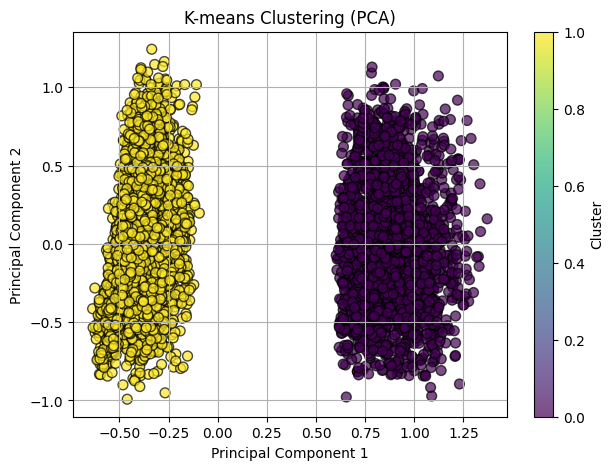

In [78]:
# Plot data points with cluster assignments in the reduced 2D space
plt.figure(figsize=(7, 5))

# Plot data points
labels = kmeans.labels_
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolors='k', alpha=0.7, s=50)

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering (PCA)')

# Add legend
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


Understanding variables of each cluster 

In [79]:
cluster_0=scaled_df[scaled_df['kmeans_cluster']==0]
summary0=cluster_0.describe()
summary0

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,kmeans_cluster,Bankrupt?
count,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,...,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.0,2125.000000,2125.0,2125.000000
mean,0.502626,0.555828,0.550595,0.604070,0.604055,0.999010,0.797431,0.809343,0.303512,0.781604,...,0.623513,0.604069,0.839890,0.281990,0.027634,0.565229,0.0,0.035219,0.0,0.042353
std,0.053865,0.057419,0.054121,0.008970,0.008957,0.000111,0.000200,0.000179,0.000208,0.000184,...,0.016657,0.008970,0.022752,0.017765,0.013021,0.018346,0.0,0.025685,0.0,0.201440
min,0.066933,0.057185,0.054821,0.555939,0.555939,0.998111,0.795724,0.807752,0.300793,0.779889,...,0.000000,0.555936,0.000000,0.133503,0.012845,0.000000,0.0,0.008500,0.0,0.000000
25%,0.478038,0.537178,0.528722,0.598560,0.598553,0.998972,0.797387,0.809311,0.303477,0.781568,...,0.623561,0.598555,0.840141,0.278020,0.026792,0.565166,0.0,0.022080,0.0,0.000000
50%,0.500951,0.559093,0.550511,0.602293,0.602286,0.999006,0.797439,0.809354,0.303522,0.781614,...,0.623764,0.602289,0.841202,0.279925,0.026835,0.565386,0.0,0.028668,0.0,0.000000
75%,0.526690,0.581880,0.575566,0.607533,0.607489,0.999054,0.797506,0.809411,0.303559,0.781671,...,0.623950,0.607532,0.842289,0.282803,0.026981,0.566000,0.0,0.039071,0.0,0.000000
max,0.864964,0.942706,0.932598,0.657548,0.657548,0.999706,0.799348,0.810966,0.306477,0.783353,...,1.000000,0.657545,1.000000,0.745352,0.540672,1.000000,0.0,0.514908,0.0,1.000000


In [80]:
# Extract only the mean row
mean_c0 = summary0.loc['mean']

In [81]:
cluster_1=scaled_df[scaled_df['kmeans_cluster']==1]
summary1=cluster_1.describe()
summary1

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,kmeans_cluster,Bankrupt?
count,4694.000000,4694.000000,4694.000000,4694.000000,4694.000000,4694.000000,4694.000000,4694.000000,4694.000000,4694.000000,...,4694.000000,4694.000000,4694.000000,4694.000000,4694.000000,4694.000000,4694.0,4694.000000,4694.0,4694.000000
mean,0.506336,0.559891,0.554944,0.609703,0.609683,0.998640,0.797080,0.808966,0.303673,0.781280,...,0.624097,0.609702,0.840634,0.279629,0.027499,0.565416,0.0,0.053173,1.0,0.027695
std,0.063505,0.068982,0.064655,0.019243,0.019223,0.015680,0.015509,0.016391,0.013455,0.015281,...,0.009682,0.019243,0.008483,0.012623,0.016730,0.010067,0.0,0.056876,0.0,0.164115
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.408682,0.000000,0.442176,0.000000,0.000000,0.172065,0.0,0.000000,1.0,0.000000
25%,0.475467,0.534807,0.526527,0.601976,0.601976,0.998967,0.797385,0.809312,0.303459,0.781566,...,0.623689,0.601973,0.840097,0.276616,0.026791,0.565158,0.0,0.026060,1.0,0.000000
50%,0.504022,0.560565,0.553456,0.608286,0.608246,0.999034,0.797483,0.809392,0.303528,0.781651,...,0.623951,0.608284,0.841160,0.278279,0.026801,0.565210,0.0,0.037108,1.0,0.000000
75%,0.539609,0.593218,0.588830,0.616071,0.616026,0.999118,0.797613,0.809497,0.303601,0.781764,...,0.624254,0.616067,0.842382,0.280788,0.026881,0.565592,0.0,0.060150,1.0,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.956387,1.000000,0.996912,1.000000,1.000000,0.736985,0.0,1.000000,1.0,1.000000


In [82]:
# Extract only the mean row
mean_c1 = summary1.loc['mean']


In [83]:
#finding the difference in means between each cluster
mean_df=pd.DataFrame({"Cluster 0 Means": mean_c0, "Cluster 1 Means": mean_c1, "Difference in Means:": mean_c0-mean_c1})
mean_df

,Cluster 0 Means,Cluster 1 Means,Difference in Means:
ROA(C) before interest and depreciation before interest,0.502626,0.506336,-0.003710
ROA(A) before interest and % after tax,0.555828,0.559891,-0.004063
ROA(B) before interest and depreciation after tax,0.550595,0.554944,-0.004348
Operating Gross Margin,0.604070,0.609703,-0.005633
Realized Sales Gross Margin,0.604055,0.609683,-0.005629
...,...,...,...
Interest Coverage Ratio (Interest expense to EBIT),0.565229,0.565416,-0.000188
Net Income Flag,0.000000,0.000000,0.000000
Equity to Liability,0.035219,0.053173,-0.017954
kmeans_cluster,0.000000,1.000000,-1.000000


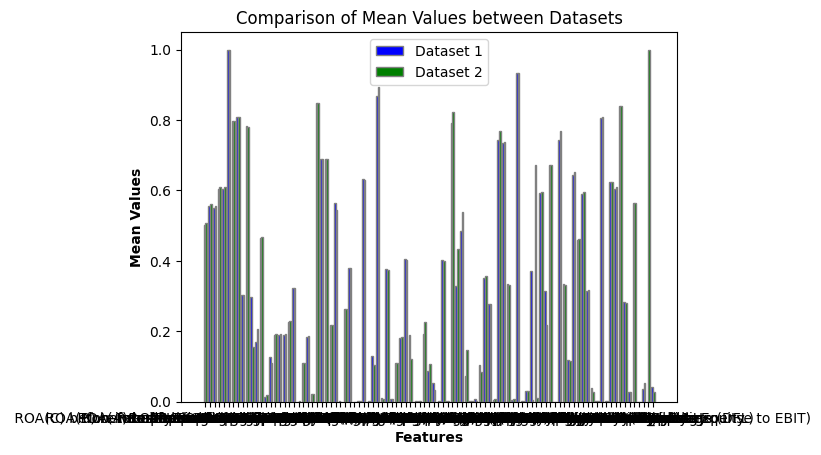

In [85]:
# Get feature names
features = mean_c1.index

# Set bar width
bar_width = 0.35

# Set position of bar on X axis
r1 = np.arange(len(features))
r2 = [x + bar_width for x in r1]

# Plotting the bar chart, *** correted check with homie
plt.bar(r1, mean_c0, color='b', width=bar_width, edgecolor='grey', label='Dataset 1')
plt.bar(r2, mean_c1, color='g', width=bar_width, edgecolor='grey', label='Dataset 2')

# Adding labels
plt.xlabel('Features', fontweight='bold')
plt.ylabel('Mean Values', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(features))], features)

# Adding legend
plt.legend()

# Title
plt.title('Comparison of Mean Values between Datasets')

# Show plot
plt.show()

## K- Nearest Neighbors

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
#k-NN classifier with k=2
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy Score:", accuracy)

Accuracy Score: 0.9655425219941349


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [88]:
from sklearn.model_selection import cross_val_score
# Define range of k values to evaluate
k_values = [1, 3, 5, 7, 9]

# Initialize lists to store average scores for each k
avg_scores = []

# Perform cross-validation for each k value
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_classifier, X_train, y_train, cv=5)  # 5-fold cross-validation
    avg_score = np.mean(scores)
    avg_scores.append(avg_score)
    print(f"Average Accuracy for k={k}: {avg_score}")

# Select the k value with the highest average accuracy
optimal_k = k_values[np.argmax(avg_scores)]
print(f"Optimal k: {optimal_k}")


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighb

Average Accuracy for k=1: 0.9528872593950505
Average Accuracy for k=3: 0.9677360219981669
Average Accuracy for k=5: 0.969019248395967


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighb

Average Accuracy for k=7: 0.9688359303391383
Average Accuracy for k=9: 0.9693858845096243
Optimal k: 9
